<a href="https://colab.research.google.com/github/qhistina281/TubesTKC_120_281/blob/main/ReplikaJurnal_UTSipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [2]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun CNN
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd gdrive/MyDrive/Praktikum ML/Project Kelompok

/content/gdrive/MyDrive/Praktikum ML/Project Kelompok


In [5]:
!cp kaggle.json /.kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
api_token = {"username":"qhistinj","key":"f709ed7ce69d920f8a14f668fff276cd"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
base_dir = 'chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [9]:
#moving all dataset to training
import shutil

dataset1= os.listdir(val_normal_dir)
for file in dataset1:
  new_path = shutil.move(f"{val_normal_dir}/{file}",train_normal_dir)

dataset2= Pr_dataset1= os.listdir(val_pneumonia_dir)
for file in dataset2:
  new_path = shutil.move(f"{val_pneumonia_dir}/{file}",train_pneumonia_dir)

dataset3= Pr_dataset1= os.listdir(test_normal_dir)
for file in dataset3:
  new_path = shutil.move(f"{test_normal_dir}/{file}",train_normal_dir)

dataset4= Pr_dataset1= os.listdir(test_pneumonia_dir)
for file in dataset4:
  new_path = shutil.move(f"{test_pneumonia_dir}/{file}",train_pneumonia_dir)

In [10]:
# Cek penamaan image yang ada di folder train_normal_dir dan train_pneumonia_dir
print(os.listdir(train_normal_dir)[:10])
print(os.listdir(train_pneumonia_dir)[:10])

['IM-0742-0001.jpeg', 'IM-0746-0001.jpeg', 'IM-0747-0001.jpeg', 'IM-0748-0001.jpeg', 'IM-0750-0001.jpeg', 'IM-0751-0001.jpeg', 'IM-0752-0001.jpeg', 'IM-0753-0001.jpeg', 'IM-0754-0001.jpeg', 'IM-0755-0001.jpeg']
['person663_virus_1247.jpeg', 'person663_virus_1248.jpeg', 'person664_virus_1249.jpeg', 'person665_bacteria_2557.jpeg', 'person665_virus_1250.jpeg', 'person666_bacteria_2558.jpeg', 'person666_virus_1251.jpeg', 'person667_virus_1252.jpeg', 'person667_virus_1253.jpeg', 'person669_bacteria_2561.jpeg']


In [11]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total val normal images:', len(os.listdir(val_normal_dir)))
print('total val pneumonia images:', len(os.listdir(val_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1583
total training pneumonia images: 4273
total val normal images: 0
total val pneumonia images: 0
total test normal images: 0
total test pneumonia images: 0


In [12]:
base_dir = 'output'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [13]:
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total val normal images:', len(os.listdir(val_normal_dir)))
print('total val pneumonia images:', len(os.listdir(val_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1266
total training pneumonia images: 3418
total val normal images: 300
total val pneumonia images: 811
total test normal images: 17
total test pneumonia images: 44


In [14]:
# TULIS KODE ANDA DISINI
# Definisikan path untuk data train test dan validation sesuai dengan path

import os

train_path = os.path.join(base_dir, 'train')
test_path  = os.path.join(base_dir, 'test')
val_path   = os.path.join(base_dir, 'val')


train_normal_dir = os.path.join(train_path, 'NORMAL')
train_pneumonia_dir = os.path.join(train_path, 'PNEUMONIA')

val_normal_dir = os.path.join(val_path, 'NORMAL')
val_pneumonia_dir = os.path.join(val_path, 'PNEUMONIA')

test_normal_dir = os.path.join(test_path, 'NORMAL')
test_pneumonia_dir = os.path.join(test_path, 'PNEUMONIA')

In [15]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

training_set = train_datagen.flow_from_directory("output/train/",
                                                 target_size=(128,128),
                                                 color_mode="rgb",
                                                 shuffle=False,
                                                 batch_size = 8,
                                                 class_mode='categorical')

Found 4684 images belonging to 2 classes.


In [16]:
validation_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

validation_set = validation_datagen.flow_from_directory("output/val/",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 8,
                                                        class_mode='categorical')

Found 1111 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

test_set = validation_datagen.flow_from_directory("output/test/",
                                                        target_size=(128,128),
                                                        color_mode="rgb",
                                                        shuffle=False,
                                                        batch_size = 8,
                                                        class_mode='categorical')

Found 61 images belonging to 2 classes.


# Preprocessing Data 

## Menampilkan Beberapa Contoh Gambar Pada Tiap Kelas

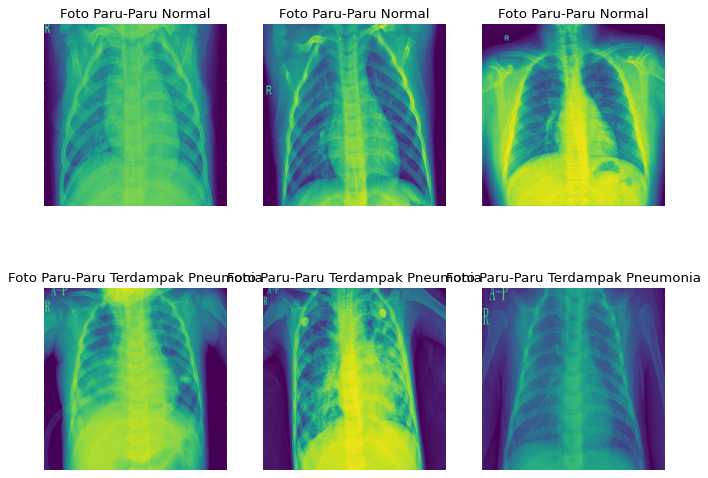

In [18]:
train_normal_images = glob(train_path+"/NORMAL/*")
train_pneumonia_images = glob(train_path+"/PNEUMONIA/*")

plt.figure(figsize=(10, 8), dpi=80)
init_subplot = 230
for i in range(1, 7):
    plt.subplot(init_subplot + i)
    
    if i < 4:
        img = Image.open(np.random.choice(train_normal_images)).resize((244, 244))
        plt.title("Foto Paru-Paru Normal")
    else:
        img = Image.open(np.random.choice(train_pneumonia_images)).resize((244, 244))
        plt.title("Foto Paru-Paru Terdampak Pneumonia")
        
    img = np.asarray(img)
    plt.axis('off')
    plt.imshow(img)

In [19]:
IMAGE_SIZE = [224, 224]

categories = ["NORMAL", "PNEUMONIA"]

## VGG19 Keras Model untuk Klasifikasi pada Gambar

In [32]:
# Menambahkan Layer untuk Preprocessing pada VGG
vgg = VGG19(input_shape = IMAGE_SIZE + [3], 
            weights = 'imagenet',
            include_top=False)


# Untuk perintah menolak men training data yang telah digunakan sebelumnya
for layer in vgg.layers:
  layer.trainable = False

## Menambahkan sejumlah layer pada model VGG

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization
from keras.layers import Dense

In [34]:
x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)

# Lapisan Terakhir dengan aktivasi softmax untuk output biner 
prediction = Dense(len(categories), activation='softmax')(x)

In [35]:
# Membuat obbjek model 
model = Model(inputs=vgg.input, outputs=prediction)

# Melihat struktur model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Meng-Compile Model

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Preparing Images for Model

In [37]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

## Getting the Images in Batches and Scaling them

In [38]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4684 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


# Mentraining model VGG16 (CNN)

In [39]:
# Mencocokan model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
147/147 [==============================] - 145s 910ms/step - loss: 1.0178 - accuracy: 0.8670 - val_loss: 0.1902 - val_accuracy: 0.9180
Epoch 2/30
147/147 [==============================] - 120s 816ms/step - loss: 0.1630 - accuracy: 0.9349 - val_loss: 0.1604 - val_accuracy: 0.9508
Epoch 3/30
147/147 [==============================] - 119s 809ms/step - loss: 0.1463 - accuracy: 0.9451 - val_loss: 0.1162 - val_accuracy: 0.9508
Epoch 4/30
147/147 [==============================] - 119s 806ms/step - loss: 0.1600 - accuracy: 0.9404 - val_loss: 0.1236 - val_accuracy: 0.9508
Epoch 5/30
147/147 [==============================] - 120s 816ms/step - loss: 0.1272 - accuracy: 0.9520 - val_loss: 0.1765 - val_accuracy: 0.9344
Epoch 6/30
147/147 [==============================] - 120s 815ms/step - loss: 0.1407 - accuracy: 0.9477 - val_loss: 0.1784 - val_accuracy: 0.9344
Epoch 7/30
147/147 [==============================] - 120s 814ms/step - loss: 0.1082 - accuracy: 0.9584 - val_loss: 0.1588 -

# Plot

 - Training Loss vs Testing Loss
 - Training Accuracy vs Testing Accuracy

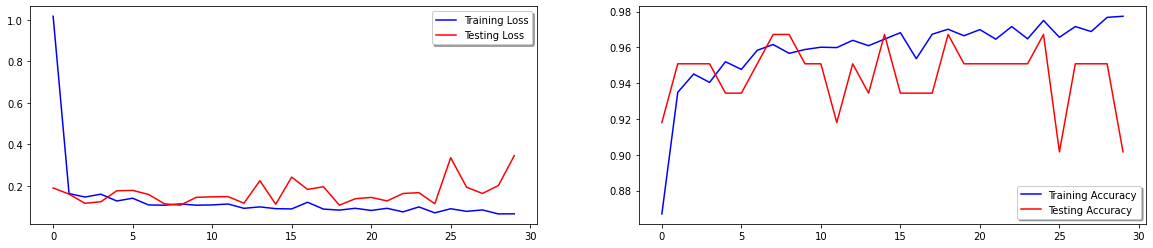

In [40]:
fig, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)

ax[0].plot(r.history['loss'], color='b', label="Training Loss")
ax[0].plot(r.history['val_loss'], color='r', label="Testing Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(r.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(r.history['val_accuracy'], color='r',label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Saving the Trained Model for Futher Use

In [ ]:
model.save('vgg19_model_1.h5')

# Loading The Saved Model and Making Predictions

In [ ]:
model = load_model('vgg19_model_1.h5')

# Testing the Model with New Images

In [ ]:
normal_images_list = glob("../input/chest-xray-pneumonia/chest_xray/val/NORMAL/*")
infected_images_list = glob("../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*")

## Code that Predicts the Class to which the Image Belongs

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    img_data = preprocess_input(x)
    classes = model.predict(img_data)
    
    pred_class = classes[0]
    
    if pred_class[0] > pred_class[1]:
        print("Normal Xray")
    else:
        print("Pneumonia XRay")